In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Outlier Detection and Removal in the Student Dataset

## Overview

In data analysis, outliers can significantly skew the results and lead to erroneous conclusions. The code outlined here focuses on identifying and removing outliers in the `student_data` dataset. This process is essential for improving the accuracy of any subsequent statistical analysis or machine learning models.

## Identifying Numeric Columns

The first step is to isolate the numeric columns as outliers are typically a concern with quantitative data:

```python
numeric_columns = student_data.select_dtypes(include=['int64', 'float64']).columns


### Outlier Detection Using Interquartile Range (IQR)

This function calculates the first (Q1) and third (Q3) quartiles, and the IQR (Q3 - Q1). Outliers are then identified as the values that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR. This method is effective for a wide range of distributions, even if they are not normally distributed.

### Summary of Outliers in Each Numeric Column

We apply the outlier detection function to each numeric column and create a summary that lists the number of outliers detected in each. This loop iterates through each numeric column, applies the outlier detection function, and stores the count of outliers in a dictionary. This summary provides a clear view of which columns contain the most significant number of outliers.

### Removing Outliers
The removal function follows the same IQR logic to define the acceptable range of values. Data points outside this range are excluded, effectively removing outliers. This loop applies the removal process to each numeric column. It's important to note that this step modifies the original dataset by excluding the outlier values.


In [56]:
student_data = pd.read_csv('student_data.csv')

student_data.dropna(inplace=True)

columns_to_convert_to_boolean = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

for column in columns_to_convert_to_boolean:
    student_data[column] = student_data[column].map({'yes': True, 'no': False})


numeric_columns = student_data.select_dtypes(include=['int64', 'float64']).columns

# Function to detect outliers using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

outlier_summary = {}
for col in numeric_columns:
    outliers = detect_outliers(student_data, col)
    outlier_summary[col] = len(outliers)

outlier_summary

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

for col in numeric_columns:
    student_data = remove_outliers(student_data, col)

new_shape = student_data.shape
new_shape




(219, 33)

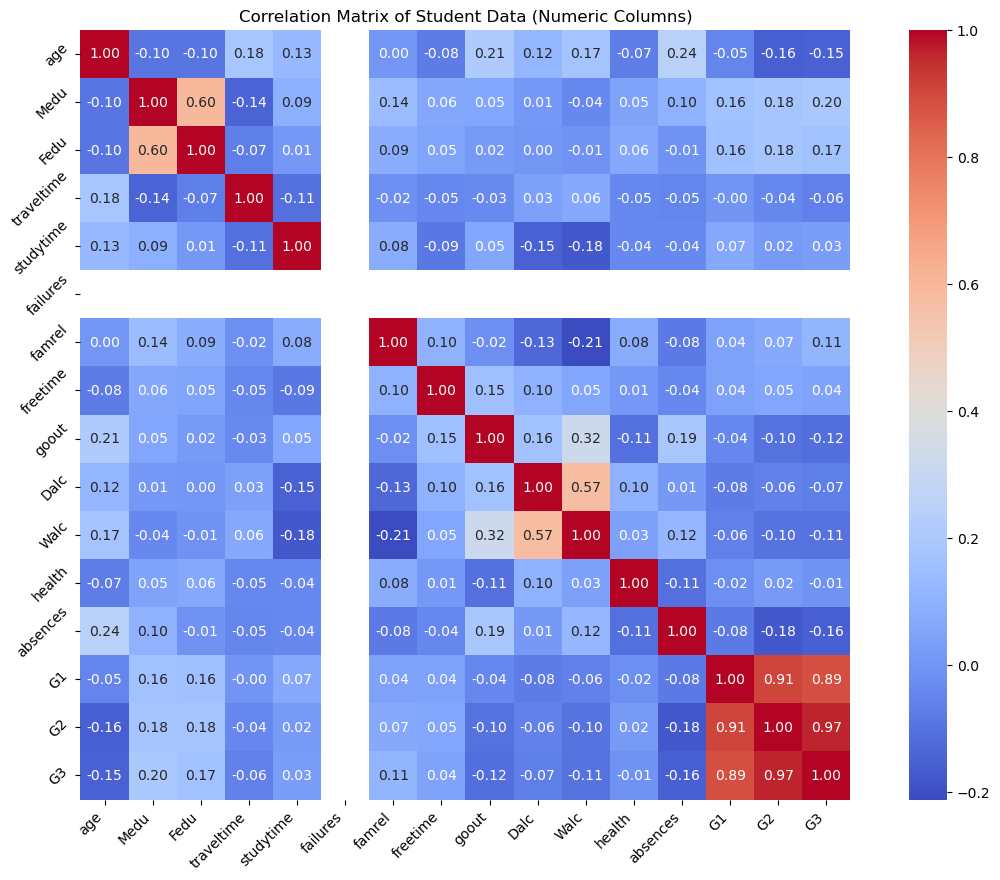

In [51]:
numeric_student_data = student_data.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(15, 10))

sns.heatmap(numeric_student_data.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)

plt.title('Correlation Matrix of Student Data (Numeric Columns)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45)

plt.show()


In [52]:
student_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,True,False,False,False,True,True,False,False,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,False,True,False,False,False,True,True,False,5,3,3,1,1,3,4,5,5,6
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,False,True,True,True,True,True,True,True,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,False,True,True,False,True,True,False,False,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,False,True,True,True,True,True,True,False,5,4,2,1,2,5,10,15,15,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,MS,F,18,R,GT3,T,2,2,at_home,other,other,mother,2,3,0,False,False,True,False,True,True,False,False,5,3,3,1,3,4,2,10,9,10
386,MS,F,18,R,GT3,T,4,4,teacher,at_home,reputation,mother,3,1,0,False,True,True,True,True,True,True,True,4,4,3,2,2,5,7,6,5,6
388,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,False,True,True,False,True,True,True,False,4,3,4,1,1,1,0,7,9,8
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,False,False,False,False,False,True,True,False,4,4,1,3,4,5,0,11,12,10


# Trend Analysis

## Objective


Our objective is to develop a predictive model to estimate student grades based on a range of influencing factors present in the dataset. This dataset encompasses various variables, including demographic details, family background, personal habits, and academic history, which potentially impact student performance. By leveraging these attributes, we aim to predict the grades of students (G1, G2, G3) with a degree of accuracy that can aid in identifying key predictors of academic success. Such a model could be instrumental for educational institutions and policymakers in formulating strategies to enhance student outcomes. Additionally, it can provide valuable insights into the relationship between students' personal and social environments and their academic achievements. This analysis will not only contribute to a better understanding of educational dynamics but also pave the way for more personalized and effective educational support systems.

## Exploratory Data Analysis

### Dataset Overview

The info() method provides a concise summary of the DataFrame. This includes the list of all columns, their data types, and the number of non-null values in each column. It's useful for getting a quick overview of the DataFrame, ensuring that the data types are correctly interpreted, and identifying columns with missing values.

### Statistical Summary of Numerical Features

The describe() method generates descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values. It's particularly useful for understanding the distribution of numerical variables. It gives the count, mean, standard deviation, minimum, quartiles, and maximum values for each numeric column.

### Visualizing Data Distribution
#### Histograms of Numerical Variables

num_cols = student_data.select_dtypes(include=['int64', 'float64']).columns
student_data[num_cols].hist(bins=15, figsize=(15, 10), layout=(4, 4))

This section of the code identifies all numeric columns and generates histograms for each. Histograms are useful for visualizing the distribution of numerical data, allowing us to see patterns, outliers, skewness, etc. The bins parameter determines the number of bins used in the histogram, and figsize and layout control the size and layout of the plot grid.

### Count Plots of Categorical Variables

Here, categorical columns are identified, and count plots are created for each. Count plots display the counts of observations in each categorical bin using bars. This is helpful to understand the distribution of categorical variables and to identify if any categories are particularly common or rare in the dataset.

### Box Plots of Numerical Variables

